# ccClub: Introduction to Machine Learning
---
## Lab 02: Basic Machine Learning with SK-Learn

## Overview

- Hyperparameter & Model Evaluation
- Classification: Support Vector Machine
- Regression: Least-Square Regression
- Clustering: K-means Clustering
- Dimensionality Reduction: Principal Components Analysis
- Demo: Hand-Written Digits

## Installation

If you have Python2 and Python3 and want to make sure you are installing for Python3, use `pip3 install ...`. For details about installing sklearn, please visit the [documentation](http://scikit-learn.org/stable/install.html).

>```python
pip install scipy
pip install sklearn
```

If you don't have NumPy, Pandas, Matplotlib or Seaborn, install them as well.

>```python
pip install numpy
pip install pandas
pip install matplotlib
pip install seaborn
```

In [1]:
# Standard Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()  # set seaborn as defaults

# Part 1: Hyperparameter & Model Evaluation

## Hyperparameter

For example, when using k-nearest neighbor classification, we have to set the number of neighbors before runing the model. In sklearn's `KNeighborsClassifier(n_neighbors=5)`, `n_neighbor` is the **hyperparameter** that we have to set before training the model.

![](img/hyperparameter.png)

## Cross-Validation

**3-fold cross-validation**

- If the dataset is small, we may not have enough data to split into 3 sets.
- We hold back some subset of the data and then use this holdout set to check the model performance.
- Each subset of the data is used both as a training set and as a validation set.

![](img/cross-validation.png)

In [2]:
# load iris data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

print(X.shape, y.shape)

(150, 4) (150,)


### `cross_val_score`

In sklearn, `cross_val_score` from `sklearn.model_selection` will return the scores of the estimator for each run of the cross validation.

```text
step 1: initialize an estimator by calling an appropriate estimator class
step 2: do cross validation using `cross_val_score(estimator, X, y, cv=n)`
    - estimator: model used to predict the data
    - X: feature matrix
    - y: target arrays
    - cv: number of cross-validation (n-fold)
step 3: average prediction accuracy
```

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)  # initialize an estimator
scores = cross_val_score(knn, X, y, cv=5)  # do cross-validation

print('cross validation accuracy:', scores)
print('average accuracy:', scores.mean())

cross validation accuracy: [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
average accuracy: 0.973333333333


## Underfitting & Overfitting

![](img/underfit_overfit.png)
![](img/underfit_overfit_plot.png)

# Part 2: Classification - Support Vector Machine (SVM)

## The Best Line?

- We want to find the line (or hyperplane) that can classify (separate) the data.
- Which line (hyperplane) should we pick? Which one is the best?

![](img/margin.png)

## Maximizing Margin

- Find the line (hyperplane) that maximize the distance (margin) between nearest data.

![](img/max_margin.png)

### Illustration of Margin

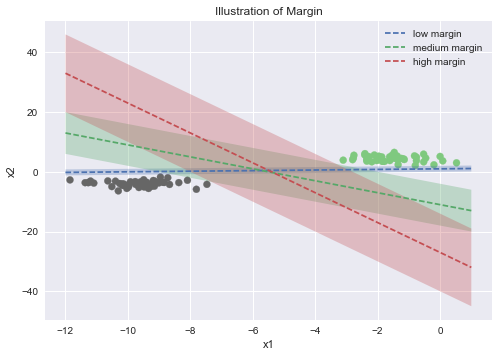

In [4]:
# The code below is used to generate the plot. It's okay if you don't understand them.

from sklearn.datasets import make_blobs

# generate data from sklearn
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1)

# function for plotting data points
def plot(x, y, color=None, title_name=None):
    plt.scatter(x, y, c=color, cmap='Accent')
    plt.xlabel('x1')
    plt.ylabel('x2')
    if title_name:
        plt.title(title_name)

# plot data point
plot(X[:, 0], X[:, 1], y, 'Illustration of Margin')

# plot decision boundary and margin
xline = np.linspace(-12, 1)
parameters = [(0.1, 1, 1, 'low margin'), (-2, -11, 7, 'medium margin'), (-5, -27, 13, 'high margin')]
for slope, intercept, margin, label_text in parameters:
    yline = slope * xline + intercept
    plt.plot(xline, yline, '--', label=label_text)
    plt.fill_between(xline, yline - margin, yline + margin, alpha=0.3)
    plt.legend();

## Construct Linear SVM

### Data

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# generate data from sklearn
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1)

# split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (750, 2)
y_train: (750,)
X_test: (250, 2)
y_test: (250,)


### `LinearSVC`

**Sklearn workflow**

> Step 1 - Import

> Step 2 - Initalize: `classifierName = LinearSVC()`

> Step 3 - Fit: `classifierName.fit(training data X, training data y)`

> Step 4 - Predict (or Transform): `classifierName.predict(feature matrix X to predict)`

> Step 5 - Evalute: `classifierName.score(feature matrix X to predict, target array y to evalute)`


In [6]:
from sklearn.svm import LinearSVC  # linear support vector classifier

classifier1 = LinearSVC()               # initialize a classifier
classifier1.fit(X_train, y_train)       # fit the data
y_pred = classifier1.predict(X_train)   # make prediction

# 2 ways to evaluate performace
print('Training Accuracy:', np.sum(y_pred == y_train) / len(y_train))  # compute it using numpy
print(classifier1.score(X_train, y_train))                              # use `.score` from sklearn

print('Testing Accuracy:', classifier1.score(X_test, y_test))

Training Accuracy: 1.0
1.0
Testing Accuracy: 1.0


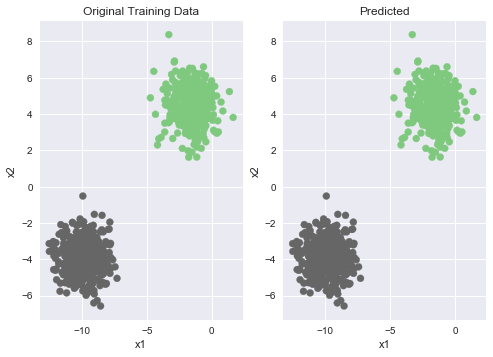

In [7]:
# plot original data
plt.subplot(121)
plot(X_train[:, 0], X_train[:, 1], y_train, 'Original Training Data')

# plot predicted value
plt.subplot(122)
plot(X_train[:, 0], X_train[:, 1], y_pred, 'Predicted')

### `SVC`

`SVC()` is a more genearal support vector machine classifier. We can use `svc()` to learn linear or non-linear relationship. To use `svc()` to construct a linear support vecotr machine, we have to set `kernel='linear'`.

```python
classifierName = SVC(kernel='linear')
```

In [8]:
from sklearn.svm import SVC # support vector classifier

classifier2 = SVC(kernel='linear') # set kernel to `linear`
classifier2.fit(X_train, y_train)

# compare prediction using LinearSVC and SVC, the prediction should be the same
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
print(np.sum(y_pred1 == y_pred2) / len(y_pred1))

1.0


## Support Vectors & Decision Boundary

- Points touching the margin are support vectors.
- We only need support vectors to train the model.
- Only the position of the support vectors matter.

```python
# get number of support vectors for each class
classifierName.n_support_

# get support vectors
classifierName.support_vectors_
```

In [9]:
# support vectors
print('number of support vectors for each class:', classifier2.n_support_)
print('support vectors:\n', classifier2.support_vectors_)

number of support vectors for each class: [1 1]
support vectors:
 [[-4.16600056  2.29232595]
 [-7.83725678 -1.95435653]]


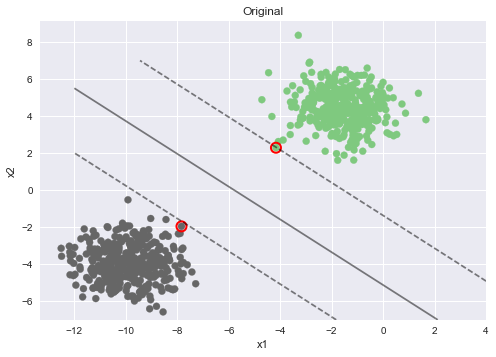

In [10]:
### Code to plot support vectors and decision boundary (No need to understand)

plot(X_train[:, 0], X_train[:, 1], y_train, 'Original')

# plot support vectors
SVs = classifier2.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], s=100, color='r', facecolors='none', linewidth=2)

# plot decision boundary and margin
def plot_boundary(xline, yline, classifier, levels=[0], linestyles=['-']):
    YY, XX = np.meshgrid(yline, xline)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    value = classifier.decision_function(xy).reshape(XX.shape)
    plt.contour(xline, yline, value, colors='k',
                levels=levels, alpha=0.5, linestyles=linestyles);

xline = np.linspace(-12, 4, 30)
yline = np.linspace(-7, 7, 30)
plot_boundary(xline, yline, classifier2, levels=[-1, 0, .93], linestyles=['--', '-', '--'])

## Kernel SVM: Non-linear Decision Boundary

- The decision boundary for the SVM model we learned so far are linear (line, plane or hyperplane)
- Kernel SVM can let us learn non-linear decision boundary.

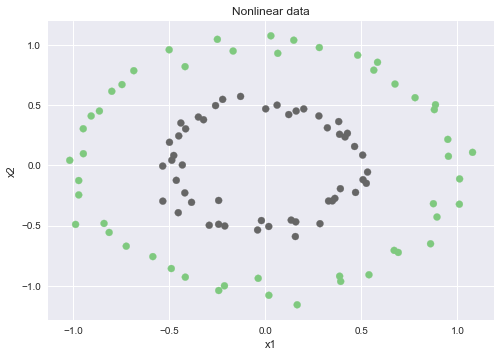

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.05, factor=.5, random_state=0)

plot(X[:, 0], X[:, 1], y, 'Nonlinear data')

### Kernel

- Common kernel: linear (`'linear'`), polynomial (`'poly'`), radial basis function (`'rbf'`), sigmoid (`'sigmoid'`)

```python
classifierName = SVC(kernel='poly', degree=n)

# kernel : string, optional (default=’rbf’)
# degree : int, optional (default=3), degree of the polynomial kernel function (‘poly’).
```

linear svm accuracy: 0.54
poly svm accuracy: 0.67
rbf svm accuracy: 1.0
sigmoid svm accuracy: 0.52


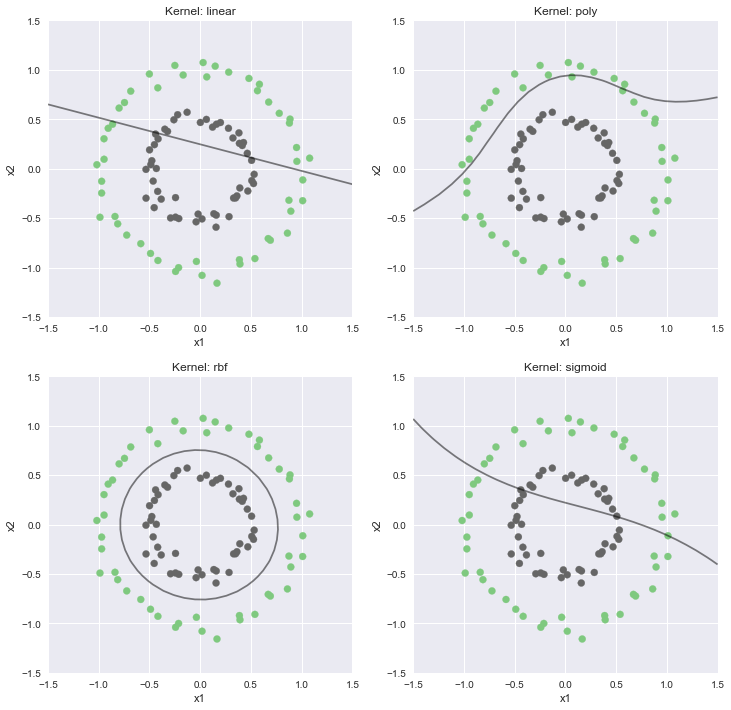

In [12]:
# set figure size
plt.figure(figsize=(12, 12))

# common kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k, n in zip(kernels, range(1, 5)):
    # initialize model
    svm = SVC(kernel=k)
    svm.fit(X, y)
    print(k + ' svm accuracy:', svm.score(X, y))
    
    # plot decision boundary
    xline = np.linspace(-1.5, 1.5, 30)
    yline = np.linspace(-1.5, 1.5, 30)
    
    plt.subplot(220+n)
    plot(X[:, 0], X[:, 1], y, 'Kernel: ' + k)
    plot_boundary(xline, yline, svm)

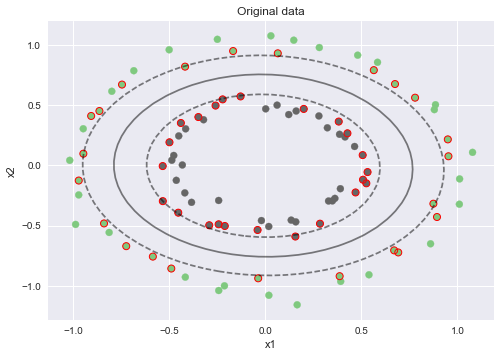

In [13]:
# nonlinear boundary (nonlinear support vector classifier)
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

# plot decision boundary
plot(X[:, 0], X[:, 1], y, 'Original data')
xline = np.linspace(-1, 1, 30)
yline = np.linspace(-1, 1, 30)
plot_boundary(xline, yline, rbf_svm, levels=[-.7, 0, .7], linestyles=['--', '-', '--'])

# plot support vectors
SVs = rbf_svm.support_vectors_
plt.scatter(SVs[:, 0], SVs[:, 1], color='r', linewidth=1, facecolors='none');

# Part 3: Regression - Least-Square Regression

## Linear Regression

We can fit a straight line to some real-valued data. You are probably very familiar with this simple linear regression model where $a$ is the **slope** and $b$ is the **intercept**.
$$
\hat{y} = ax+b
$$

What least-square regression does is to find this best line, $\hat{y} = ax+b$, which minimizes the sum of squared error (or mean squared error).

> **Least-square: minimize the sum of squared error (SE) or mean squared error (MSE)**

Error means the difference between real answer $y$ and the predicuted value $\hat{y}$. The sum of squared error is the sum of all $(y - \hat{y})^2$ for all the data points.

> Sum of squared error (SE): $\sum^{n}_{i=1} (y - \hat{y})^2$

> Mean squared error (MSE): $\frac{\sum^{n}_{i=1}(y - \hat{y})^2}{N}$

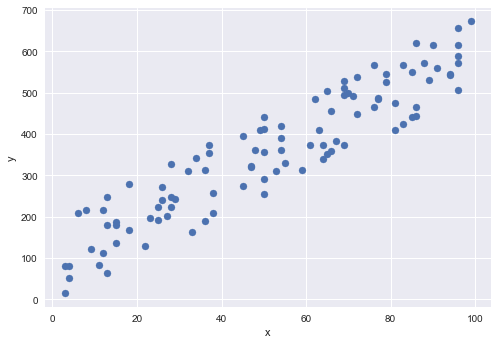

In [14]:
x = np.random.randint(100, size=100)
y = 5 * x - 3 + np.random.randint(200, size=100)

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

## `LinearRegression` Estimator

To fit a linear regression model, we can use sklearn's `LinearRegression()` Estimator from `sklearn.linear_model` class.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


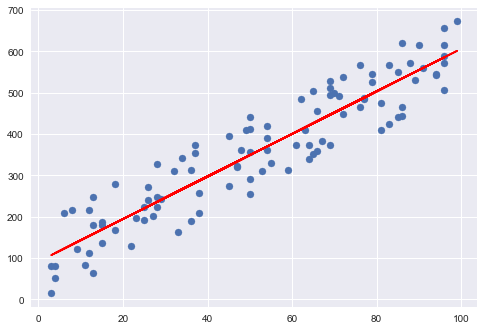

In [15]:
from sklearn.linear_model import LinearRegression

# transform 1D array into 2D (n_sample, n_features), in this example n_features = 1
x = x.reshape(len(x), 1)

# initialize linear regressin model
linear_reg = LinearRegression()

# fit data
linear_reg.fit(x, y);

y_pred = linear_reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, 'r');

You can find the coefficients and intercept of the linear regression model by using `.coef_` and `.intercept_`.

In [16]:
print('coefficients:', linear_reg.coef_)
print('intercept:', linear_reg.intercept_)

coefficients: [ 5.14279005]
intercept: 91.5020664215


## Muiltidimensional Linear Regression

Now we have a simple linear model, we can expand the same idea into multidimensions, meaning multiple features. Using only one feature is often too simple, we may want to use many features ($x_i$) at the same time. 

$$
\hat{y} = a_0 + a_1 x_1 + a_2 x_2 + ... a_n x_n
$$

In a simple linear regression, we are fitting a line to the data. In a 3 dimensions, we are fitting a plane to the data and in higher dimensions, we are fitting a hyper-plane to the data. It is usually very difficult to visualize a hyper-plane in a high-dimension space but we can still see an example.

In [17]:
x = np.random.randint(100, size=(100, 3))  # x shape = (100, 3)

# coefficients: [0.5, 3, 1.5], intercept: 5
y = 5 + 0.5 * x[:, 0] + 3 * x[:, 1] + 1.5 * x[:, 2]  # y shape = (100,)

print(x.shape, y.shape)

(100, 3) (100,)


In [18]:
# initialize linear regressin model
multi_reg = LinearRegression()

# fit data
multi_reg.fit(x, y);

# coeff & intercept
print('coefficients:', multi_reg.coef_)
print('intercept:', multi_reg.intercept_)

coefficients: [ 0.5  3.   1.5]
intercept: 5.0


## Polynomial Regression

Sometimes a linear relationship may be too simple. If we want to model a non-linear relationship, one common trick is to transform the data according to a basis function and then train a linear regression on the transformed data. This appproach allows the model to learn a much wider range of patterns (relationships) of data while mainting a generally fast performance of a linear model.

### Polynomial Features

We have our simple linear regression from the previous section.

$$
\hat{y} = a_0 + a_1 x
$$

For example, if we want to fit a parabola to the data instead of a straight line, we can extend our linear regression by combining a second-order polynomials. The model will looks like this, assuming we have one feature $x$ here:

$$
\hat{y} = a_0 + a_1 x + a_2 x^2
$$

We can also combine higher-order polynomials. These are called **polynomial features**.

$$
\hat{y} = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4
$$

In the example below, we have

$$
\hat{y_1} = 5 x -3 \\
\hat{y_2} = x + x^2 \\
\hat{y_3} = x + x^2 + 0.1 x^3
$$

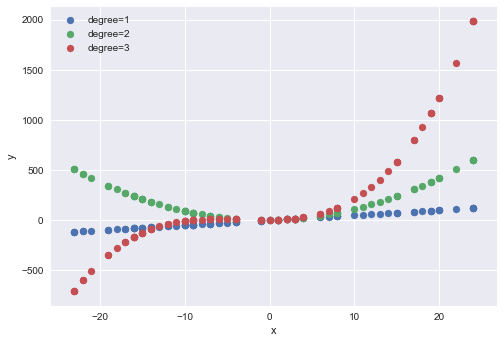

In [19]:
# polynomial relationship (degree = 2)
x = np.random.randint(50, size=100) - 25
y1 = 5 * x - 3 
y2 = x + x**2 
y3 = x + x**2 + 0.1 * x**3

plt.scatter(x, y1, label='degree=1')
plt.scatter(x, y2, label='degree=2')
plt.scatter(x, y3, label='degree=3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

We can have multiple features $x_1, x_2, ... x_n$ and combine their second-order polynomials to construct something more complex. For example, if we have 2 features $x_1, x_2$, we can construct a polynomial regression like this:

$$
\hat{y} = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_1x_2 + a_4 x_1^2 + a_5 x_2^2
$$

### Polynomial Regression Is Still A Linear Model

Something surprising here is that a polynomial regression is still a linear model. To observe this, we can create another new variables $z_i$, where

$$
[z_1, z_2, z_3, z_4, z_5] = [x_1, x_2, x_1x_2, x_1^2, x_2^2]
$$

And we can re-write our model as

$$
\hat{y} = a_0 + a_1 z_1 + a_2 z_2 + a_3 z_3 + a_4 z_4 + a_5 z_5
$$

We can see that the resulting model is the same class of the multidimensional linear regression. The model is **linear** in $a_n$. The linearity means that the coefficients $a_n$ never multiply or divide each other.

By incroporating polynomial features, we have the capability to capture non-linear relationship using only a simple linear model.

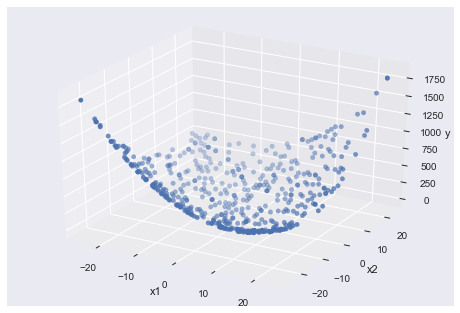

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.random.randint(50, size=500) - 25
x2 = np.random.randint(50, size=500) - 25
y = x1 + x2 + x1*x2 + (x1**2) + (x2**2)

ax.scatter(x1, x2, y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()

## `PolynomailFeatures()`

We can construct polynomial features directly by using `PolynomialFeatures()` from `sklearn.preprocessing` class.

> - input: 2D array
> - degree: Integer
    - The degree of the polynomial features. 
    - Default = 2.
> - include_bias:
    - If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [21]:
# construct polynomial features with degree = 3
from sklearn.preprocessing import PolynomialFeatures

x = np.array([[1, 2, 3, 4, 5]]).T  # 2D array
poly = PolynomialFeatures(degree=3, include_bias=False)
print(poly.fit_transform(x))

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


In [22]:
# includ_bias = True
print(PolynomialFeatures(degree=3, include_bias=True).fit_transform(x))

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]]


### Pipeline: Automate Machine Learning Workflow

Sklearn provdies a handy class `make_pipeline` from `sklearn.pipeline` that can automate the machine learning workflow. It allows various transformation to be chained together. We can also add an estimator (i.e. a model) at the end. Data will flow from the start of the pipleine to the end, and it will be transformed and fed to the next step.

> We can use the pipeline object in 2 ways:
> 1. `fit` -> `transform`:  if the pipeline ends with a transformer
> 2. `fit` -> `predict`: if the pipeline ends with an estimator

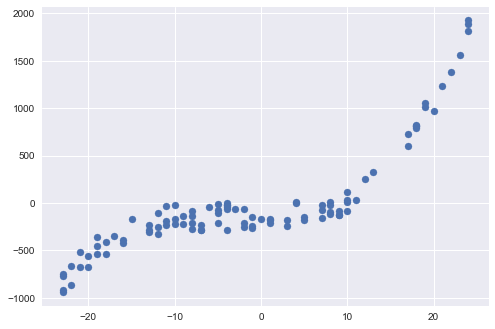

In [23]:
# generate data
x = np.random.randint(50, size=100) - 25  # 1D array
y =  x + x**2 + 0.1 * x**3 - np.random.randint(300, size=100)

plt.scatter(x, y);

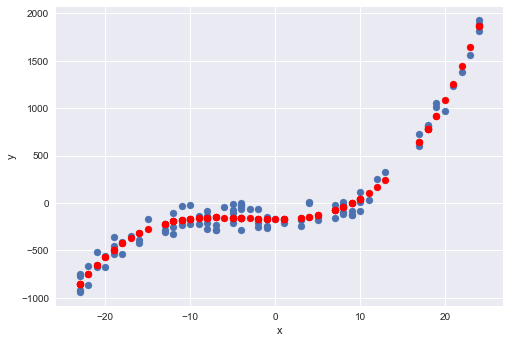

In [24]:
from sklearn.pipeline import make_pipeline

x = x.reshape(len(x), 1)  # convert x into 2D array, x.shape(100, 1)

# construct a pipeline
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

# ------- equivalent to --------
# poly = PolynomialFeatures(3)
# x_poly = poly.fit_transform(x)
# poly_reg = LinearRegression()
# -------------------------------

# data will be be transformed into polynomial features and then fed to linear regression model
poly_reg.fit(x, y)
y_pred = poly_reg.predict(x)

plt.scatter(x, y)
plt.scatter(x, y_pred, color='r')
plt.xlabel('x')
plt.ylabel('y');

# Part 4: Clustering - K-means Clustering

In [25]:
# load Iris Dataset from seaborn (dataframe)
sns.load_dataset('Iris').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


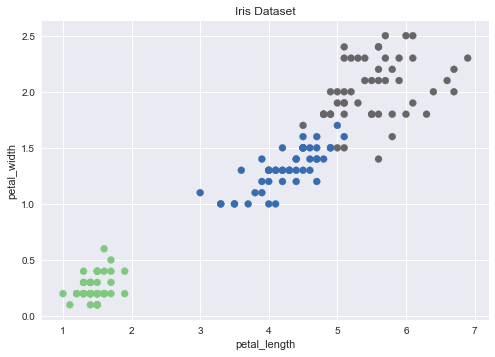

In [26]:
from sklearn.datasets import load_iris

# load Iris data's features matrix and target array from sklearn
# X and y are numpy array!
X, y = load_iris(return_X_y=True)

plt.scatter(X[:, 2], X[:, 3], c=y, cmap='Accent')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Iris Dataset');

## `KMeans`

```
Step 1: Find k centroids in the data.
Step 2: Assign each point to the closest group.
Step 3: Recalculate the centroids for each group.
Step 4: Re-assign the data to the new closest group based on new centroids.
Step 5: Iterate 3 and 4 until no changes can be made or some maximum number of iteration.
```

In sklearn, we can use `KMeans` from `sklearn.cluster` to perform k-means clustering. We must provide the hyperparameter `n_cluster`, number of cluster, to the model.

```python
modelName = KMeans(n_clusters=n)
modelName.fit(X)                   # no target array y (unsupervise learning)
y_clusters = modelName.predict(X)  # assign each point a cluster
```

In [27]:
from sklearn.cluster import KMeans

# 3 cluster centers
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans_3 = kmeans.predict(X)

In [28]:
print('3 cluster centers:\n', kmeans.cluster_centers_)

3 cluster centers:
 [[ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


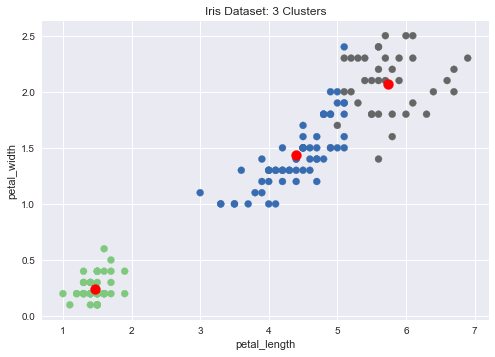

In [29]:
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans_3, cmap='Accent')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Iris Dataset: 3 Clusters');

# plot centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='r', s=100);

### Try Out Different Number of Clusters

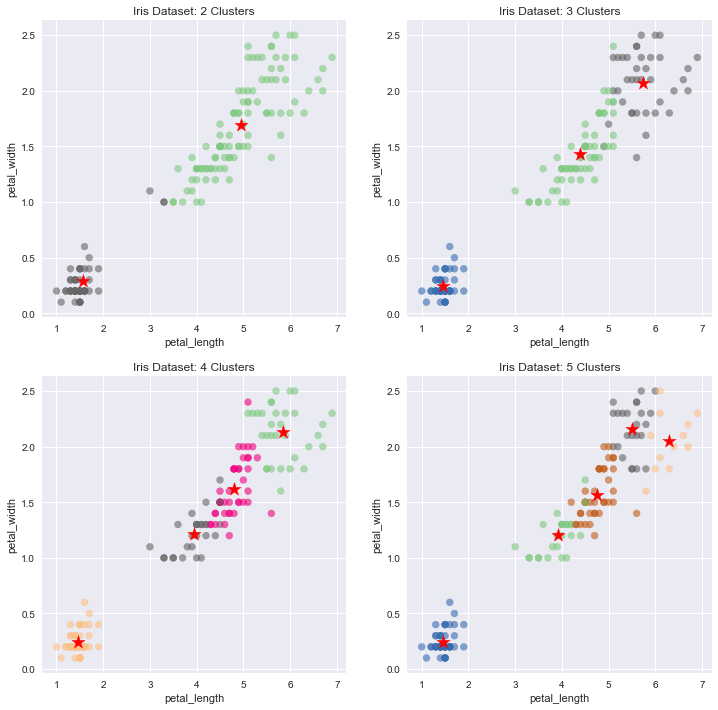

In [30]:
# try 2 - 6 cluster centers
plt.figure(figsize=(12, 12))
for c in range(2, 6):
    kmeans = KMeans(n_clusters=c) 
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.subplot(220+(c-1))
    plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, alpha=0.6, cmap='Accent')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.title('Iris Dataset: %d Clusters' %c);

    # plot centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 2], centers[:, 3], c='r', s=200, marker='*');

## Slow on Large Dataset

31.3 ms ± 996 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


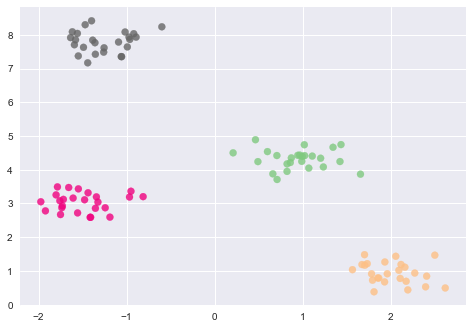

In [31]:
from sklearn.datasets.samples_generator import make_blobs

# smaller dataset (100 samples)
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', alpha=0.8);

# %timeit is a jupyter notebook magic function that can time the execution of a single piece of code
%timeit KMeans(n_clusters=c).fit(X)

116 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


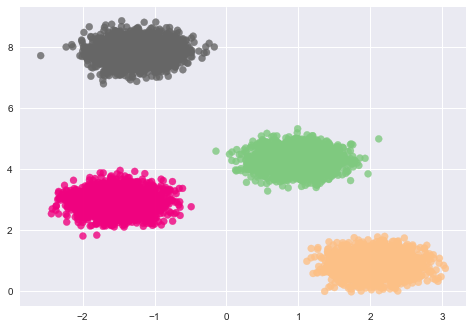

In [32]:
# larger dataset (10000 samples)
X, y = make_blobs(n_samples=10000, centers=4, cluster_std=0.3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Accent', alpha=0.8);

%timeit KMeans(n_clusters=c).fit(X)

## Part 5: Dimensionality Reduction - Principal Components Analysis

- Try to reduce the complexity of the data while keeping the important information as much as possible.
- It can be used for feature extraction or feature engineering.

![](http://www.turingfinance.com/wp-content/uploads/2014/10/Dimensionality.png)

(sources: http://www.turingfinance.com/wp-content/uploads/2014/10/Dimensionality.png)

In [33]:
### Code to generate data (no need to understand)

import math

# function to generate random data
def generate_data(size=100):
    np.random.seed(0)
    x1 = np.random.normal(0, 1, size)
    x2 = np.random.normal(0, .2, size)

    # rotate data points
    angle = math.radians(30)
    cos = math.cos(angle)
    sin = math.sin(angle)
    xx1 = cos * x1 - sin * x2
    xx2 = sin * x1 + cos * x2
    X = np.vstack([xx1, xx2]).T

    return X

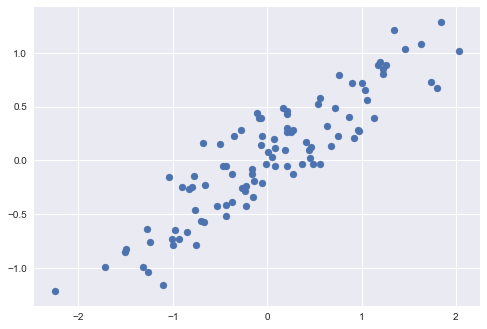

In [34]:
X = generate_data()
plt.scatter(X[:, 0], X[:, 1]);

## Principal Axes

- We try to find some principal axes (componenets) in the data and try to use those axes to describe the data.
- We can drop less important variables while still having the most valuable parts of the data.

## Compoenets & Explained Variances

- We can use PCA to find more important axes and obtain a lower-dimensional projection of the data that preserves the most important information (aka less complex version of the data).
- The projection of the data point on the principle axes are the principal components.

## Dimensionality Reduction

- We can use PCA to find more important axes and obtain a lower-dimensional projection of the data that preserves the most important information (aka less complex version of the data).
- The projection of the data point on the principle axes are the principal components.

## `PCA`

```python
from sklearn.decomposition impot PCA
modelName = PCA(n_componenets=n)     # n_components cannot exceed number of features
modelNmae.fit(X)
X_projected = modelName.transform(X)
```

In [35]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)  # n_components cannot exceed number of features
pca1.fit(X)
X_pca1 = pca1.transform(X)

print('explanied variances in each direction:', pca1.explained_variance_)
print('componenets (direction):', pca1.components_)

explanied variances in each direction: [ 1.02665089]
componenets (direction): [[-0.8538131  -0.52057968]]


**1 Principal Componenet**

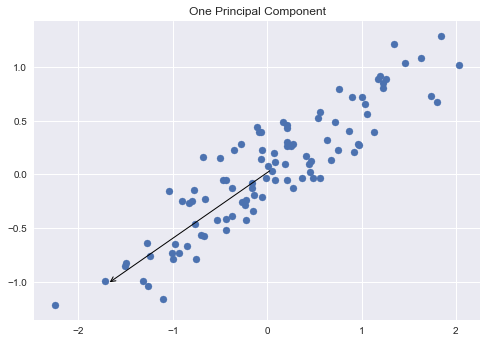

In [36]:
### code to plot pca direction (no need to understand)
# function to plot pca direction
def plot_pca_direction(pca, title_name):
    for variance, direction in zip(pca.explained_variance_, pca.components_):
        center = pca.mean_
        axis = pca.mean_ + (direction * np.sqrt(variance)*2)
        arrowprops=dict(arrowstyle='<-', linewidth=1)
        plt.annotate('', center, axis, arrowprops=arrowprops)
        plt.title(title_name)
        

# plot 1 pc direction
plt.scatter(X[:, 0], X[:, 1]);
plot_pca_direction(pca1, 'One Principal Component')

**Projected on to the first dimension**

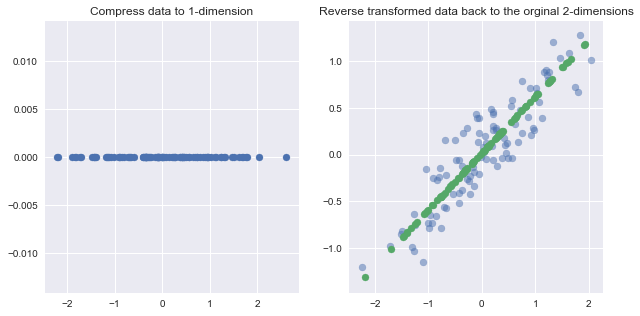

In [37]:
### Code to generate the plot (no need to understand)
plt.figure(figsize=(10, 5))

# plot transformed data
plt.subplot(121)
plt.scatter(X_pca1, np.zeros(len(X_pca1)))
plt.title('Compress data to 1-dimension')

# put transformed data back to the original plot
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Reverse transformed data back to the orginal 2-dimensions')

X_pca1_inverse = pca1.inverse_transform(X_pca1)
plt.scatter(X_pca1_inverse [:, 0], X_pca1_inverse[:, 1]);

### 2 Principal Components

In [38]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)  # n_components cannot exceed number of features
pca2.fit(X)

print('explanied variances in each direction:', pca2.explained_variance_)
print('componenets (direction):\n', pca2.components_)

explanied variances in each direction: [ 1.02665089  0.04269057]
componenets (direction):
 [[-0.8538131  -0.52057968]
 [-0.52057968  0.8538131 ]]


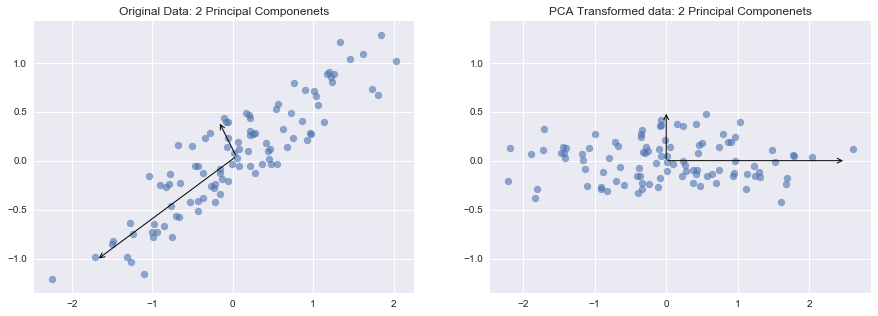

In [39]:
### Code to generate the plot (no need to understand)
plt.figure(figsize=(15, 5))

# plot pca direction
plot1 = plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plot_pca_direction(pca2, 'Original Data: 2 Principal Componenets')

# transform data
X_pca2 = pca2.transform(X)

# plot pca transformed data
plt.subplot(122)
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], alpha=0.6)
plt.title('PCA Transformed data: 2 Principal Componenets')
plt.ylim(plot1.get_ylim())

# plot diretion
center = [0, 0]
direction = [[2.5, 0], [0, .5]]

for d in direction:
    arrowprops=dict(arrowstyle='<-', linewidth=1)
    plt.annotate('', center, d, arrowprops=arrowprops);

## Reverse PCA Transformed Data Back

```python
X_reverse = modelName.inverse_transform(X_projected_data)
```

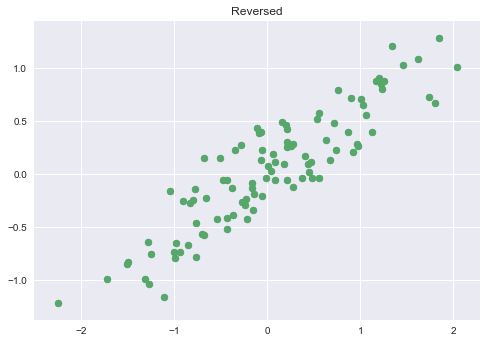

In [40]:
# Reverse projected data back (should get the same data)

X_pca2_inverse = pca2.inverse_transform(X_pca2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5);
plt.scatter(X_pca2_inverse[:, 0], X_pca2_inverse[:, 1])
plt.title('Reversed');

# Part 6: Demo - Hand-Written Digits

## Data

Each image is a 8x8 hand-written digits. We flatten the original 1797x8x8 matrix into a 1797x64 array. Here we have $1797$ samples and each sample has a 64 features (pixels). The traget is digits $0$ to $9$.

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
digits_X, digits_y = load_digits(return_X_y=True)
print('image shape: ', digits.images.shape)
print('image target names:, ', digits.target_names)
print('X: ', digits_X.shape)
print('y: ', digits_y.shape)

image shape:  (1797, 8, 8)
image target names:,  [0 1 2 3 4 5 6 7 8 9]
X:  (1797, 64)
y:  (1797,)


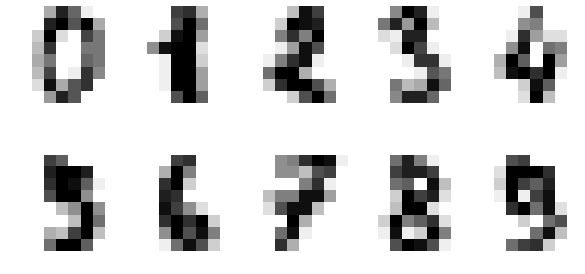

In [42]:
### code to generate images (no need to understand)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for img, ax in zip(digits.images[:10], axes.flat):
    ax.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
    ax.axis('off')

### Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

Training set shape:  (1347, 64)
Testing set shape:  (450, 64)


## SVM Classification

**Classifiy digits using SVM Classification (supervised)**

In [44]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    print(kernel+' svm training accuracy: ', svm.score(X_train, y_train))
    print(kernel+' svm testing accuracy: ', svm.score(X_test, y_test))

linear svm training accuracy:  1.0
linear svm testing accuracy:  0.984444444444
poly svm training accuracy:  1.0
poly svm testing accuracy:  0.988888888889
rbf svm training accuracy:  1.0
rbf svm testing accuracy:  0.488888888889
sigmoid svm training accuracy:  0.103934669636
sigmoid svm testing accuracy:  0.0911111111111


## KMeans Clustering

**Cluster digits into 10 clusters (unsupervised)**

In [45]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(digits_X)
print('cluster centers shape:', kmeans.cluster_centers_.shape)

cluster centers shape: (10, 64)


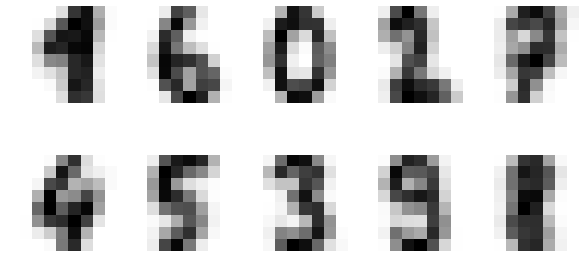

In [46]:
### code to generate images (no need to understand)
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for center, ax in zip(centers, axes.flat):
    ax.imshow(center, cmap=plt.cm.binary)
    ax.axis('off')

## PCA - Image Compression

**Compress (project) images into lower-dimensions (unsupervised)**

In [47]:
pca = PCA(n_components=16)  # project from 64 to 16 dimensions
digits_pca = pca.fit_transform(digits_X)
print('Original data shape:,', digits_X.shape)
print('Projected data shape:,', digits_pca.shape)

Original data shape:, (1797, 64)
Projected data shape:, (1797, 16)


### Projection

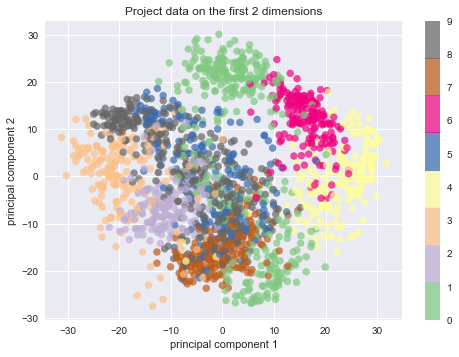

In [48]:
# plot pca projection on the first 2 dimensions

plt.scatter(digits_pca[:, 0],digits_pca[:, 1], c=digits_y, cmap='Accent', alpha=0.7)
plt.colorbar();
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('Project data on the first 2 dimensions');

### Compressed Images

**Compress iamges using PCA with only 16 features (dimensions).**

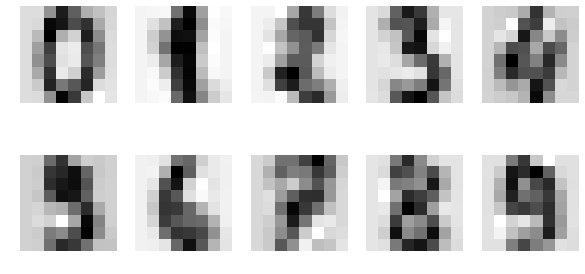

In [49]:
### code to generate images (no need to understand)
images_pca = pca.mean_ + digits_pca.dot(pca.components_)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for img, ax in zip(images_pca[:10], axes.flat):
    ax.imshow(img.reshape(8, 8), cmap=plt.cm.binary)
    ax.axis('off')

In [50]:
# The End